In [6]:
import numpy as np # алгебра
import pandas as pd # работа с данными

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras


import torch

In [45]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [46]:
print(x_train.shape, x_test.shape)
# 60.000 изображений, 28х28 пикселей

(60000, 28, 28) (10000, 28, 28)


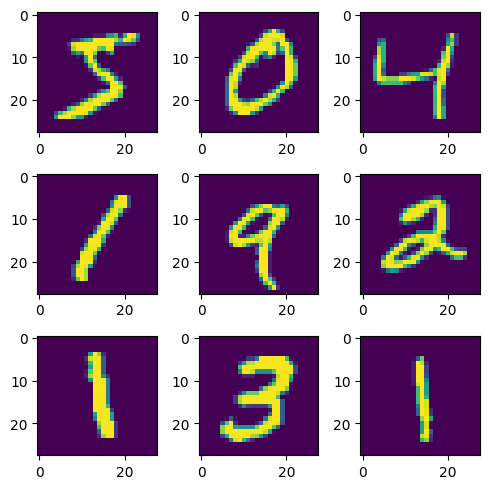

In [47]:
plt.figure(figsize=(5,5))

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i])

plt.tight_layout()
plt.show()

In [48]:
x_train = x_train / 255
x_test = x_test / 255

In [49]:
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam


In [50]:
model = Sequential() # "последовательная сеть"
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64,  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,  activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [52]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8504 - loss: 0.5213 - val_accuracy: 0.9528 - val_loss: 0.1614
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9599 - loss: 0.1340 - val_accuracy: 0.9617 - val_loss: 0.1238
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9715 - loss: 0.0948 - val_accuracy: 0.9672 - val_loss: 0.1132
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9775 - loss: 0.0720 - val_accuracy: 0.9683 - val_loss: 0.1093
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9815 - loss: 0.0565 - val_accuracy: 0.9710 - val_loss: 0.1024
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9863 - loss: 0.0414 - val_accuracy: 0.9706 - val_loss: 0.1011
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9873 - loss: 0.0408 - val_accuracy: 0.9712 - val_loss: 0.1064
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9898 - loss: 0.0318

In [59]:
from sklearn.metrics import accuracy_score

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1) # оставляем макс вероятность

y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1) # класс с макс вероятностью

print(accuracy_score(y_test, y_predict))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.9728


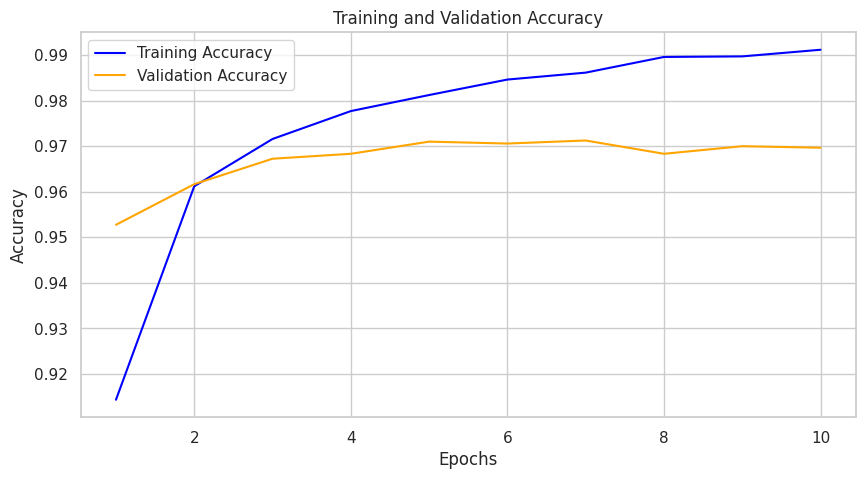

In [60]:
sns.set(style='whitegrid')


plt.figure(figsize=(10, 5))

sns.lineplot(x=range(1, len(history.history['accuracy']) + 1),
             y=history.history['accuracy'],
             label='Training Accuracy',
             color='blue')


sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1),
             y=history.history['val_accuracy'],
             label='Validation Accuracy',
             color='orange')


plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

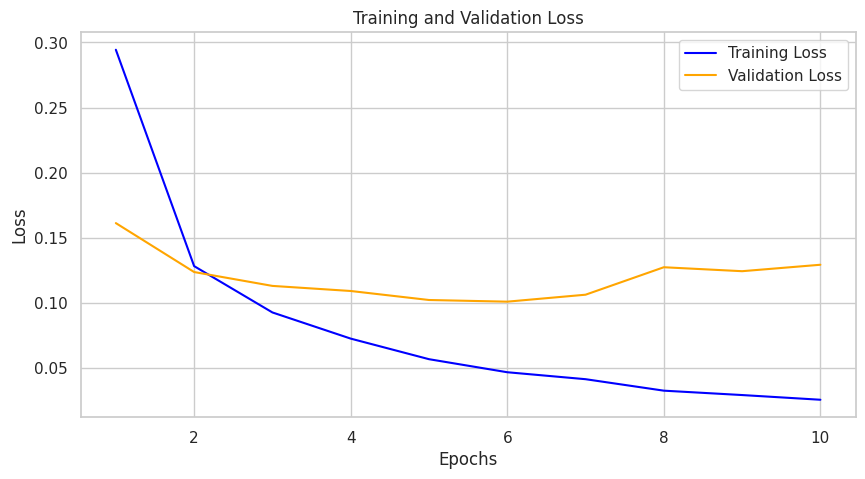

In [61]:
sns.set(style='whitegrid')


plt.figure(figsize=(10, 5))

sns.lineplot(x=range(1, len(history.history['loss']) + 1),
             y=history.history['loss'],
             label='Training Loss',
             color='blue')


sns.lineplot(x=range(1, len(history.history['val_loss']) + 1),
             y=history.history['val_loss'],
             label='Validation Loss',
             color='orange')


plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()